In [ ]:
!pip3 install numpy==1.24.2 pandas==1.5.3
import numpy as np
import pandas as pd

!pip3 install scikit-learn==1.2.1
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score

!pip3 install matplotlib==3.7.0 seaborn==0.12.2
import matplotlib.pyplot as plt
%matplotlib inline

!pip3 install tabulate
from tabulate import tabulate

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

!pip3 install folium==0.14.0
import folium
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings("ignore")

In [ ]:
filepath = "/content/drive/MyDrive/Colab Notebooks/house_data.csv"


In [ ]:
df = pd.DataFrame(pd.read_csv(filepath))

In [ ]:
df.head()

,Rooms,Age,Distance,Accessibility,Tax,DisadvantagedPosition,Crime,NitricOxides,PupilTeacher,Residential,NonRetail,Price
0,5.565,70.6,2.0635,24,666,17.16,8.79212,0.584,20.2,0.0,18.10,11.7
1,6.879,77.7,3.2721,8,307,9.93,0.62356,0.507,17.4,0.0,6.20,27.5
2,5.972,76.7,3.1025,4,304,9.97,0.34940,0.544,18.4,0.0,9.90,20.3
3,6.943,97.4,1.8773,5,403,4.59,1.22358,0.605,14.7,0.0,19.58,41.3
4,5.926,71.0,2.9084,24,666,18.13,15.57570,0.580,20.2,0.0,18.10,19.1


In [ ]:
df.tail()

,Rooms,Age,Distance,Accessibility,Tax,DisadvantagedPosition,Crime,NitricOxides,PupilTeacher,Residential,NonRetail,Price
394,6.019,65.3,2.4091,6,391,12.92,0.23912,0.585,19.2,0.0,9.69,21.2
395,5.936,80.3,2.7792,24,666,16.94,8.20058,0.713,20.2,0.0,18.10,13.5
396,6.590,40.4,5.4917,7,329,9.50,0.03537,0.433,16.1,34.0,6.09,22.0
397,6.405,85.4,2.7147,5,384,10.63,0.22876,0.520,20.9,0.0,8.56,18.6
398,6.556,29.1,4.5667,5,398,4.56,0.12579,0.437,15.2,45.0,3.44,29.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rooms                  399 non-null    float64
 1   Age                    399 non-null    float64
 2   Distance               399 non-null    float64
 3   Accessibility          399 non-null    int64  
 4   Tax                    399 non-null    int64  
 5   DisadvantagedPosition  399 non-null    float64
 6   Crime                  399 non-null    float64
 7   NitricOxides           399 non-null    float64
 8   PupilTeacher           399 non-null    float64
 9   Residential            399 non-null    float64
 10  NonRetail              399 non-null    float64
 11  Price                  399 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 37.5 KB


In [ ]:
df.describe()

,Rooms,Age,Distance,Accessibility,Tax,DisadvantagedPosition,Crime,NitricOxides,PupilTeacher,Residential,NonRetail,Price
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,6.313130,68.776441,3.765977,9.609023,410.451128,12.489975,3.975191,0.555370,18.483960,11.966165,11.104010,22.703509
std,0.709658,28.483255,2.149947,8.782264,170.424454,7.143052,9.431691,0.116655,2.178329,24.231416,6.996832,9.682972
min,3.561000,2.900000,1.129600,1.000000,187.000000,1.730000,0.006320,0.385000,12.600000,0.000000,0.740000,5.000000
25%,5.888500,45.500000,2.058100,4.000000,277.000000,6.825000,0.078805,0.449000,17.400000,0.000000,4.950000,16.550000
50%,6.240000,77.700000,3.102500,5.000000,334.000000,10.880000,0.253560,0.538000,19.100000,0.000000,8.560000,21.400000
75%,6.642000,94.500000,5.116700,24.000000,666.000000,16.950000,3.805910,0.631000,20.200000,17.750000,18.100000,26.450000
max,8.780000,100.000000,12.126500,24.000000,711.000000,37.970000,88.976200,0.871000,22.000000,100.000000,27.740000,50.000000


In [ ]:
evaluation = pd.DataFrame(
    {
        "Model": [],
        "Details": [],
        "Root Mean Squared Error (RMSE)": [],
        "R-squared (training)": [],
        "Adjusted R-squared (training)": [],
        "R-squared (test)": [],
        "Adjusted R-squared (test)": [],
        "5-Fold Cross Validation": [],
    }
)

In [ ]:
#Property Details:
#Rooms: average number of rooms per dwelling.
#Age: proportion of owner-occupied units built prior to 1940.
#Distance: weighted distances to employment centres.
#Accessibility: index of accessibility to highways.
#Tax: full-value property-tax rate per $10,000.
#DisadvantagedPosition: % lower status of the population.
#Crime: per capita crime rate.
#NitricOxides: nitric oxides concentration (parts per 10 million).
#PupilTeacher: pupil-teacher ratio by town.
#Residential: proportion of residential land zoned for lots over 25,000 sq.ft.
#NonRetail: proportion of non-retail business acres per town.
#Price: prices of the house in thousands of dollars (USD). (Dependent Variable)

In [ ]:
#Function to calculate adjusted R2:

def adjustedR2(r2, n, k):
    return r2 - (k - 1) / (n - k) * (1 - r2)

##Data Checking

In [ ]:
# checking if any value is missing
print(df.isnull().any())

Rooms                    False
Age                      False
Distance                 False
Accessibility            False
Tax                      False
DisadvantagedPosition    False
Crime                    False
NitricOxides             False
PupilTeacher             False
Residential              False
NonRetail                False
Price                    False
dtype: bool


In [ ]:
# checking for categorical data
print(df.dtypes)

Rooms                    float64
Age                      float64
Distance                 float64
Accessibility              int64
Tax                        int64
DisadvantagedPosition    float64
Crime                    float64
NitricOxides             float64
PupilTeacher             float64
Residential              float64
NonRetail                float64
Price                    float64
dtype: object


## Simple linear regression

When we model a linear relationship between a response and just one explanatory variable, that is simple linear regression.

We want to predict house prices. For a simple model we need to select a feature.

In [ ]:
df.corr()

,Rooms,Age,Distance,Accessibility,Tax,DisadvantagedPosition,Crime,NitricOxides,PupilTeacher,Residential,NonRetail,Price
Rooms,1.000000,-0.246985,0.210110,-0.225986,-0.313500,-0.610217,-0.221452,-0.324485,-0.355299,0.305636,-0.397908,0.687792
Age,-0.246985,1.000000,-0.744664,0.463769,0.511034,0.589540,0.349846,0.733982,0.292160,-0.585534,0.649564,-0.384552
Distance,0.210110,-0.744664,1.000000,-0.495243,-0.523743,-0.498760,-0.372976,-0.764173,-0.232624,0.674534,-0.705691,0.258080
Accessibility,-0.225986,0.463769,-0.495243,1.000000,0.903577,0.509284,0.629406,0.609319,0.457630,-0.321656,0.594555,-0.396367
Tax,-0.313500,0.511034,-0.523743,0.903577,1.000000,0.562811,0.580812,0.663271,0.465694,-0.326599,0.721836,-0.484625
DisadvantagedPosition,-0.610217,0.589540,-0.498760,0.509284,0.562811,1.000000,0.464586,0.616221,0.377729,-0.418836,0.609658,-0.755573
Crime,-0.221452,0.349846,-0.372976,0.629406,0.580812,0.464586,1.000000,0.420050,0.290104,-0.204487,0.403862,-0.397300
NitricOxides,-0.324485,0.733982,-0.764173,0.609319,0.663271,0.616221,0.420050,1.000000,0.184955,-0.527367,0.763697,-0.442540
PupilTeacher,-0.355299,0.292160,-0.232624,0.457630,0.465694,0.377729,0.290104,0.184955,1.000000,-0.383902,0.392209,-0.513362
Residential,0.305636,-0.585534,0.674534,-0.321656,-0.326599,-0.418836,-0.204487,-0.527367,-0.383902,1.000000,-0.534437,0.356004


<Axes: >

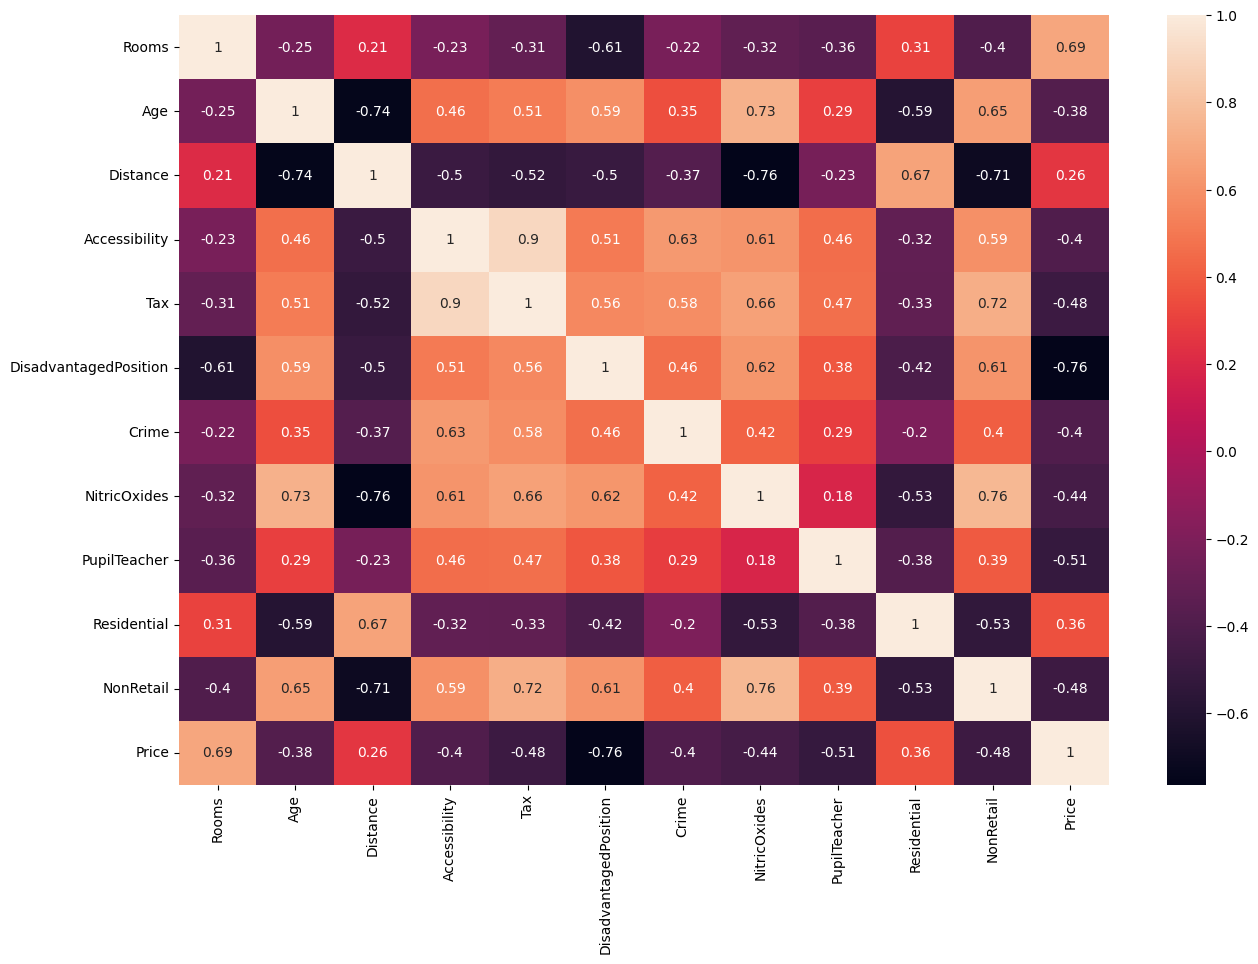

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True,cmap='rocket')

In [ ]:
df.columns

Index(['Rooms', 'Age', 'Distance', 'Accessibility', 'Tax',
       'DisadvantagedPosition', 'Crime', 'NitricOxides', 'PupilTeacher',
       'Residential', 'NonRetail', 'Price'],
      dtype='object')

In [ ]:
#DisadvantagedPosition, Rooms, PupilTeacher, Tax and NonRetail  have the highest correlation with Price.

# splitting train/test

feature_name = "DisadvantagedPosition"

train_data, test_data = train_test_split(df, train_size=0.8, random_state=42)
x_train = np.array(train_data[feature_name], dtype=pd.Series).reshape(-1, 1)
y_train = np.array(train_data["Price"], dtype=pd.Series)
x_test = np.array(test_data[feature_name], dtype=pd.Series).reshape(-1, 1)
y_test = np.array(test_data["Price"], dtype=pd.Series)

In [ ]:
# linear regression

lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
pred = lr.predict(x_test)
pred

array([22.31033673,  8.32592743, 15.34848898, 29.02932933,  8.70032913,
        9.47948942, 27.70374494, 20.47880411, 29.71741893, 26.41863642,
       32.31799287, 23.04902116, 24.77936413, 18.36394047, 19.56809728,
       27.63291219, 20.25618688, 17.20025953, 31.66026016, 24.2127021 ,
       14.59968558, 21.97641089, 27.31922428, 11.89792199, 18.10084739,
       18.32346461, 20.1651162 ,  5.13845354, 29.10016208, 25.60911924,
       22.39128845, 11.39197376, 27.26862946, 27.58231737, 11.19971343,
       25.63947613, 28.19957422, 13.9925477 , 25.88233129, 28.82695003,
       20.96451442, 18.30322668, 22.44188327, 20.47880411, 28.24005008,
       27.49124668, 25.18412272, 22.71509532, 29.8995603 , 30.557293  ,
       20.92403856, 25.90256922, 29.8995603 , 18.16156118, 20.63058858,
       27.93648113, 16.22883891, 28.79659314, 31.69061706, 25.21447961,
       13.74969254, 29.58587239, 32.44953941, 17.94906292, 30.42574646,
       28.6650466 , 27.81505356, 26.19601919, 14.36694939, 22.38

In [ ]:
# scoring our prediction
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)), ".3f"))
rtrsm = float(format(lr.score(x_train, y_train), ".3f"))
rtesm = float(format(lr.score(x_test, y_test), ".3f"))
cv = float(
    format(cross_val_score(lr, df[[feature_name]], df["Price"], cv=5).mean(), ".3f")
)

print("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print("Intercept: {}".format(lr.intercept_))
print("Coefficient: {}".format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = [
    "Simple Linear Regression",
    "-",
    rmsesm,
    rtrsm,
    "-",
    rtesm,
    "-",
    cv,
]
evaluation

Average Price for Test Data: 21.855
Intercept: 35.46499091133937
Coefficient: [-1.01189648]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,5.864,0.568,-,0.577,-,0.564


###Polynomial Regression

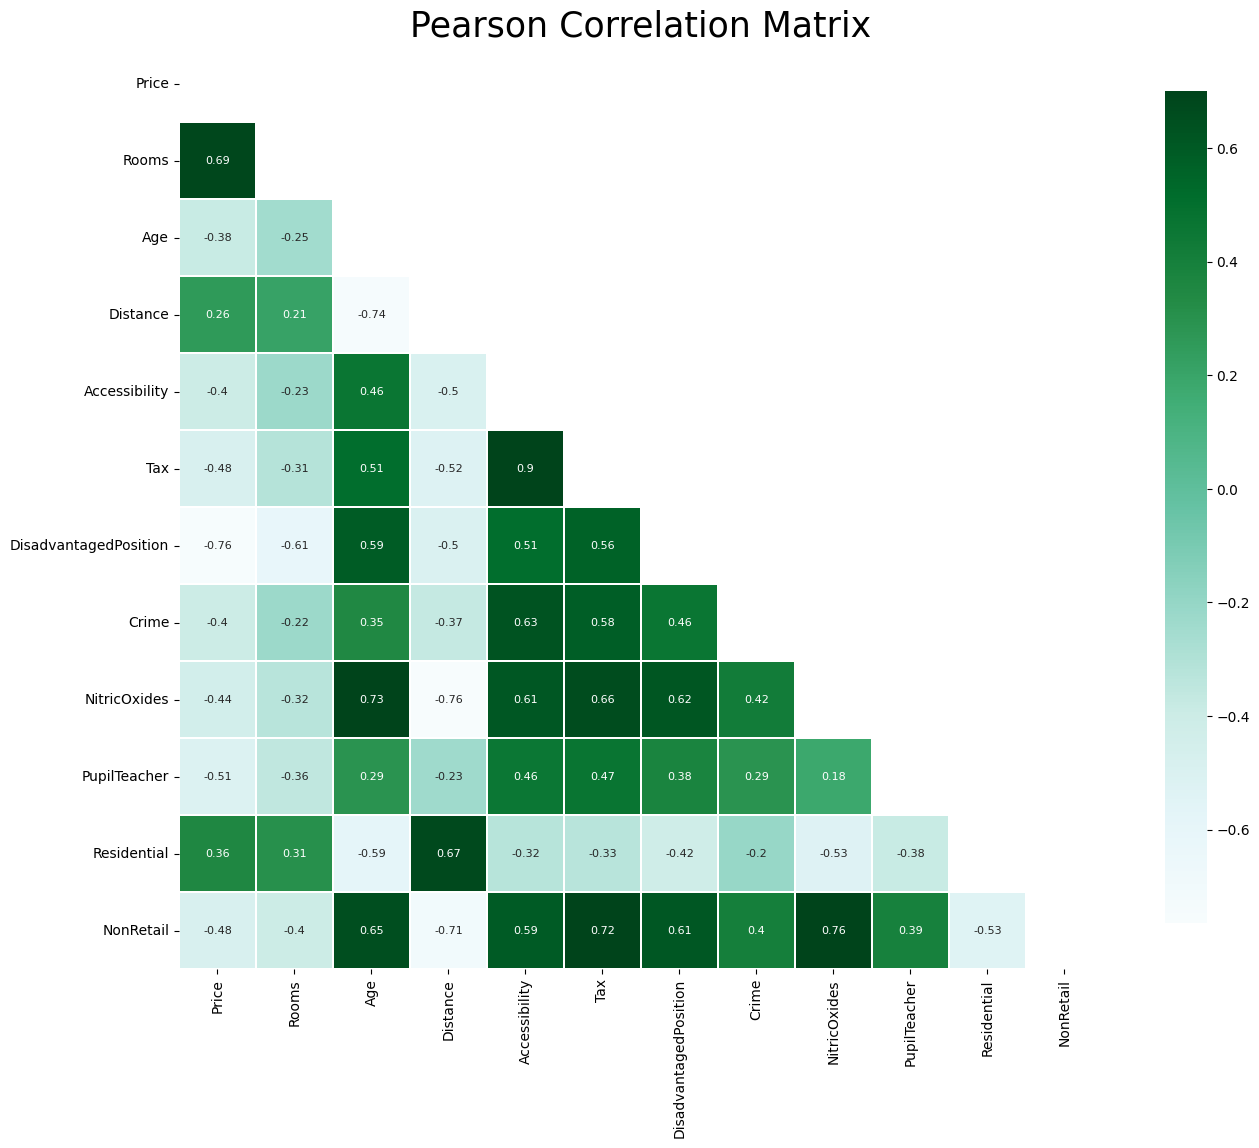

In [ ]:
features = [
    'Price', 'Rooms', 'Age', 'Distance', 'Accessibility', 'Tax',
       'DisadvantagedPosition', 'Crime', 'NitricOxides', 'PupilTeacher',
       'Residential', 'NonRetail'
    ]

mask = np.zeros_like(df[features].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title("Pearson Correlation Matrix", fontsize=25)

sns.heatmap(
    df[features].corr(),
    linewidths=0.25,
    vmax=0.7,
    square=True,
    cmap="BuGn",  # "BuGn_r" to reverse
    linecolor="w",
    annot=True,
    annot_kws={"size": 8},
    mask=mask,
    cbar_kws={"shrink": 0.9},
);

In [ ]:
POLY = True

In [ ]:
if POLY:
  # Initializing the evaluation dataframe with empty columns
    evaluation_poly = pd.DataFrame(
        {
            "Model": [],
            "Details": [],
            "Root Mean Squared Error (RMSE)": [],
            "R-squared (training)": [],
            "Adjusted R-squared (training)": [],
            "R-squared (test)": [],
            "Adjusted R-squared (test)": [],
            "5-Fold Cross Validation": [],
        }
    )

    # Define features
    #DisadvantagedPosition, Rooms, PupilTeacher, Tax and NonRetail  have the highest correlation with Price.
    #Tax and Accessibility have 0.9 correlation, so we can drop Accessibility

    features = [
    'Rooms', 'Tax', 'DisadvantagedPosition', 'PupilTeacher','NonRetail'
    ]

    #Function to calculate adjusted R2:

    def adjustedR2(r2, n, k):
      return r2 - (k - 1) / (n - k) * (1 - r2)

    # Split the data into train and test sets
    train_data, test_data = train_test_split(df, train_size=0.8, random_state=3)

    # Polynomial regression with degree=2 with selected features
    polyfeat = PolynomialFeatures(degree=2)
    X_allpoly = polyfeat.fit_transform(df[features])
    X_trainpoly = polyfeat.fit_transform(train_data[features])
    X_testpoly = polyfeat.fit_transform(test_data[features])
    poly = linear_model.LinearRegression().fit(X_trainpoly, train_data["Price"])

    pred1 = poly.predict(X_testpoly)

    # Calculate evaluation metrics
    rmsepoly1 = float(
        format(np.sqrt(metrics.mean_squared_error(test_data["Price"], pred1)), ".3f")
    )
    rtrpoly1 = float(format(poly.score(X_trainpoly, train_data["Price"]), ".3f"))
    artrpoly1 = float(format(adjustedR2(poly.score(X_trainpoly, train_data["Price"]),train_data.shape[0],len(features)), ".3f"))
    rtepoly1 = float(format(poly.score(X_testpoly, test_data["Price"]), ".3f"))
    artepoly1 = float(format(adjustedR2(poly.score(X_testpoly, test_data["Price"]),test_data.shape[0],len(features)), ".3f"))
    cv1 = float(
        format(
            cross_val_score(
                linear_model.LinearRegression(), X_allpoly, df["Price"], cv=5
            ).mean(),
            ".3f",
        )
    )
    print("Polynomial regression with degree=2 with selected features")
    print("Intercept: {}".format(poly.intercept_))
    print("Coefficient: {}".format(poly.coef_))

    # Polynomial regression with degree=3 with selected features
    polyfeat = PolynomialFeatures(degree=3)
    X_allpoly = polyfeat.fit_transform(df[features])
    X_trainpoly = polyfeat.fit_transform(train_data[features])
    X_testpoly = polyfeat.fit_transform(test_data[features])
    poly = linear_model.LinearRegression().fit(X_trainpoly, train_data["Price"])

    pred2 = poly.predict(X_testpoly)

    # Calculate evaluation metrics
    rmsepoly2 = float(
        format(np.sqrt(metrics.mean_squared_error(test_data["Price"], pred2)), ".3f")
    )
    rtrpoly2 = float(format(poly.score(X_trainpoly, train_data["Price"]), ".3f"))
    artrpoly2 = float(format(adjustedR2(poly.score(X_trainpoly, train_data["Price"]),train_data.shape[0],len(features)),".3f"))
    rtepoly2 = float(format(poly.score(X_testpoly, test_data["Price"]), ".3f"))
    artepoly2 = float(format(adjustedR2(poly.score(X_testpoly, test_data["Price"]),test_data.shape[0],len(features)),".3f"))
    cv2 = float(
        format(
            cross_val_score(
                linear_model.LinearRegression(), X_allpoly, df["Price"], cv=5
            ).mean(),
            ".3f",
        )
    )
    print("Polynomial regression with degree=3 with selected features")
    print("Intercept: {}".format(poly.intercept_))
    print("Coefficient: {}".format(poly.coef_))


    # Features with all available variables
    features = [
    'Rooms', 'Age', 'Distance', 'Accessibility', 'Tax',
       'DisadvantagedPosition', 'Crime', 'NitricOxides', 'PupilTeacher',
       'Residential', 'NonRetail'
    ]
    # Polynomial regression with degree=2, all features
    polyfeat = PolynomialFeatures(degree=2)
    X_allpoly = polyfeat.fit_transform(df[features])
    X_trainpoly = polyfeat.fit_transform(train_data[features])
    X_testpoly = polyfeat.fit_transform(test_data[features])
    poly = linear_model.LinearRegression().fit(X_trainpoly, train_data["Price"])

    pred3 = poly.predict(X_testpoly)

    # Calculate evaluation metrics
    rmsepoly3 = float(
        format(np.sqrt(metrics.mean_squared_error(test_data["Price"], pred3)), ".3f")
    )
    rtrpoly3 = float(format(poly.score(X_trainpoly, train_data["Price"]), ".3f"))
    artrpoly3 = float(format(adjustedR2(poly.score(X_trainpoly, train_data["Price"]),train_data.shape[0],len(features)),".3f"))
    rtepoly3 = float(format(poly.score(X_testpoly, test_data["Price"]), ".3f"))
    artepoly3 = float(format(adjustedR2(poly.score(X_testpoly, test_data["Price"]),test_data.shape[0],len(features)),".3f"))
    cv3 = float(
        format(
            cross_val_score(
                linear_model.LinearRegression(), X_allpoly, df["Price"], cv=5
            ).mean(),
            ".3f",
        )
    )
    print("Polynomial regression with degree=2, all features")
    print("Intercept: {}".format(poly.intercept_))
    print("Coefficient: {}".format(poly.coef_))

    # Polynomial regression with degree=3, all features
    polyfeat = PolynomialFeatures(degree=3)
    X_allpoly = polyfeat.fit_transform(df[features])
    X_trainpoly = polyfeat.fit_transform(train_data[features])
    X_testpoly = polyfeat.fit_transform(test_data[features])
    poly = linear_model.LinearRegression().fit(X_trainpoly, train_data["Price"])

    pred4 = poly.predict(X_testpoly)

    # Calculate evaluation metrics
    rmsepoly4 = float(
        format(np.sqrt(metrics.mean_squared_error(test_data["Price"], pred4)), ".3f")
    )
    rtrpoly4 = float(format(poly.score(X_trainpoly, train_data["Price"]), ".3f"))
    artrpoly4 = float(format(adjustedR2(poly.score(X_trainpoly, train_data["Price"]),train_data.shape[0],len(features)),".3f"))
    rtepoly4 = float(format(poly.score(X_testpoly, test_data["Price"]), ".3f"))
    artepoly4 = float(format(adjustedR2(poly.score(X_testpoly, test_data["Price"]),test_data.shape[0],len(features)),".3f"))
    cv4 = float(
        format(
            cross_val_score(
                linear_model.LinearRegression(), X_allpoly, df["Price"], cv=5
            ).mean(),
            ".3f",
        )
    )
    print("Polynomial regression with degree=3, all features")
    print("Intercept: {}".format(poly.intercept_))
    print("Coefficient: {}".format(poly.coef_))


    # Regularization techniques can help in reducing overfitting by penalizing models that have too many complex features.
    # Regularization techniques can help to improve stability by reducing the variance of the model's coefficients.

    # Ridge regression adds a penalty term to the cost function that is proportional to the squared magnitude of the coefficients.
    # This penalty term helps to prevent the model from fitting too closely to the training data.

    # Lasso regression adds a penalty term to the cost function that is equal to the absolute value of the coefficients.
    # This penalty term can help to shrink the coefficients of unimportant features to zero, which can make the model more interpretable.

    # Polynomial Ridge Regression with alpha=1, degree=3, all features
    polyfeat = PolynomialFeatures(degree=3)
    X_allpoly = polyfeat.fit_transform(df[features])
    X_trainpoly = polyfeat.fit_transform(train_data[features])
    X_testpoly = polyfeat.fit_transform(test_data[features])
    poly = linear_model.Ridge(alpha=1).fit(X_trainpoly, train_data["Price"])

    pred6 = poly.predict(X_testpoly)

    # Calculate evaluation metrics
    rmsepoly6 = float(
        format(np.sqrt(metrics.mean_squared_error(test_data["Price"], pred6)), ".3f")
    )
    rtrpoly6 = float(format(poly.score(X_trainpoly, train_data["Price"]), ".3f"))
    artrpoly6 = float(format(adjustedR2(poly.score(X_trainpoly, train_data["Price"]),train_data.shape[0],len(features)),".3f"))
    rtepoly6 = float(format(poly.score(X_testpoly, test_data["Price"]), ".3f"))
    artepoly6 = float(format(adjustedR2(poly.score(X_testpoly, test_data["Price"]),test_data.shape[0],len(features)),".3f"))
    cv6 = float(
        format(
            cross_val_score(
                linear_model.Ridge(alpha=1), X_allpoly, df["Price"], cv=5
            ).mean(),
            ".3f",
        )
    )
    print("Polynomial Ridge Regression with alpha=1, degree=2, all features")
    print("Intercept: {}".format(poly.intercept_))
    print("Coefficient: {}".format(poly.coef_))


    # Polynomial Ridge Regression with alpha=50000, degree=3, all features
    polyfeat = PolynomialFeatures(degree=3)
    X_allpoly = polyfeat.fit_transform(df[features])
    X_trainpoly = polyfeat.fit_transform(train_data[features])
    X_testpoly = polyfeat.fit_transform(test_data[features])
    poly = linear_model.Ridge(alpha=50000).fit(X_trainpoly, train_data["Price"])

    pred7 = poly.predict(X_testpoly)

    # Calculate evaluation metrics
    rmsepoly7 = float(
        format(np.sqrt(metrics.mean_squared_error(test_data["Price"], pred7)), ".3f")
    )
    rtrpoly7 = float(format(poly.score(X_trainpoly, train_data["Price"]), ".3f"))
    artrpoly7 = float(format(adjustedR2(poly.score(X_trainpoly, train_data["Price"]),train_data.shape[0],len(features)),".3f"))
    rtepoly7 = float(format(poly.score(X_testpoly, test_data["Price"]), ".3f"))
    artepoly7 = float(format(adjustedR2(poly.score(X_testpoly, test_data["Price"]),test_data.shape[0],len(features)),".3f"))
    cv7 = float(
        format(
            cross_val_score(
                linear_model.Ridge(alpha=50000), X_allpoly, df["Price"], cv=5
            ).mean(),
            ".3f",
        )
    )
    print("Polynomial Ridge Regression with alpha=50000, degree=2, all features")
    print("Intercept: {}".format(poly.intercept_))
    print("Coefficient: {}".format(poly.coef_))

    # Polynomial Lasso Regression with alpha=1, degree=3, all features
    polyfeat = PolynomialFeatures(degree=3)
    X_allpoly = polyfeat.fit_transform(df[features])
    X_trainpoly = polyfeat.fit_transform(train_data[features])
    X_testpoly = polyfeat.fit_transform(test_data[features])
    poly = linear_model.Lasso(alpha=1).fit(X_trainpoly, train_data["Price"])

    pred8 = poly.predict(X_testpoly)

    # Calculate evaluation metrics
    rmsepoly8 = float(
        format(np.sqrt(metrics.mean_squared_error(test_data["Price"], pred8)), ".3f")
    )
    rtrpoly8 = float(format(poly.score(X_trainpoly, train_data["Price"]), ".3f"))
    artrpoly8 = float(format(adjustedR2(poly.score(X_trainpoly, train_data["Price"]),train_data.shape[0],len(features)),".3f"))
    rtepoly8 = float(format(poly.score(X_testpoly, test_data["Price"]), ".3f"))
    artepoly8 = float(format(adjustedR2(poly.score(X_testpoly, test_data["Price"]),test_data.shape[0],len(features)),".3f"))
    cv8 = float(
        format(
            cross_val_score(
                linear_model.Lasso(alpha=1), X_allpoly, df["Price"], cv=5
            ).mean(),
            ".3f",
        )
    )
    print("Polynomial Lasso Regression with alpha=1, degree=2, all features")
    print("Intercept: {}".format(poly.intercept_))
    print("Coefficient: {}".format(poly.coef_))


    # Polynomial Lasso Regression with alpha=50000, degree=3, all features
    polyfeat = PolynomialFeatures(degree=3)
    X_allpoly = polyfeat.fit_transform(df[features])
    X_trainpoly = polyfeat.fit_transform(train_data[features])
    X_testpoly = polyfeat.fit_transform(test_data[features])
    poly = linear_model.Lasso(alpha=50000).fit(X_trainpoly, train_data["Price"])

    pred9 = poly.predict(X_testpoly)

    # Calculate evaluation metrics
    rmsepoly9 = float(
        format(np.sqrt(metrics.mean_squared_error(test_data["Price"], pred9)), ".3f")
    )
    rtrpoly9 = float(format(poly.score(X_trainpoly, train_data["Price"]), ".3f"))
    artrpoly9 = float(format(adjustedR2(poly.score(X_trainpoly, train_data["Price"]),train_data.shape[0],len(features)),".3f"))
    rtepoly9 = float(format(poly.score(X_testpoly, test_data["Price"]), ".3f"))
    artepoly9 = float(format(adjustedR2(poly.score(X_testpoly, test_data["Price"]),test_data.shape[0],len(features)),".3f"))
    cv9 = float(
        format(
            cross_val_score(
                linear_model.Lasso(alpha=50000), X_allpoly, df["Price"], cv=5
            ).mean(),
            ".3f",
        )
    )
    print("Polynomial Lasso Regression with alpha=50000, degree=2, all features")
    print("Intercept: {}".format(poly.intercept_))
    print("Coefficient: {}".format(poly.coef_))

    r = evaluation_poly.shape[0]
    evaluation_poly.loc[r] = [
        "Polynomial Regression",
        "degree=2, selected features, no preprocessing",
        rmsepoly1,
        rtrpoly1,
        artrpoly1,
        rtepoly1,
        artepoly1,
        cv1,
    ]
    evaluation_poly.loc[r + 1] = [
        "Polynomial Regression",
        "degree=3, selected features, no preprocessing",
        rmsepoly2,
        rtrpoly2,
        artrpoly2,
        rtepoly2,
        artepoly2,
        cv2,
    ]
    evaluation_poly.loc[r + 2] = [
        "Polynomial Regression",
        "degree=2, all features, no preprocessing",
        rmsepoly3,
        rtrpoly3,
        artrpoly3,
        rtepoly3,
        artepoly3,
        cv3,
    ]
    evaluation_poly.loc[r + 3] = [
        "Polynomial Regression",
        "degree=3, all features, no preprocessing",
        rmsepoly4,
        rtrpoly4,
        artrpoly4,
        rtepoly4,
        artepoly4,
        cv4,
    ]
    evaluation_poly.loc[r + 4] = [
        "Polynomial Ridge Regression",
        "alpha=1, degree=3, all features",
        rmsepoly6,
        rtrpoly6,
        artrpoly6,
        rtepoly6,
        artepoly6,
        cv6,
    ]
    evaluation_poly.loc[r + 5] = [
        "Polynomial Ridge Regression",
        "alpha=50000, degree=3, all features",
        rmsepoly7,
        rtrpoly7,
        artrpoly7,
        rtepoly7,
        artepoly7,
        cv7,
    ]
    evaluation_poly.loc[r + 6] = [
        "Polynomial Lasso Regression",
        "alpha=1, degree=3, all features",
        rmsepoly8,
        rtrpoly8,
        artrpoly8,
        rtepoly8,
        artepoly8,
        cv8,
    ]
    evaluation_poly.loc[r + 7] = [
        "Polynomial Lasso Regression",
        "alpha=50000, degree=3, all features",
        rmsepoly9,
        rtrpoly9,
        artrpoly9,
        rtepoly9,
        artepoly9,
        cv9,
    ]
    evaluation_poly_temp = evaluation_poly[
        [
            "Model",
            "Details",
            "Root Mean Squared Error (RMSE)",
            "R-squared (training)",
            "R-squared (test)",
            "5-Fold Cross Validation",
        ]
    ]
    evaluation_poly_temp.sort_values(by="5-Fold Cross Validation", ascending=False)

    # Display the evaluation results using tabulate
    print(tabulate(evaluation_poly, headers='keys', tablefmt='pretty'))

Polynomial regression with degree=2 with selected features
Intercept: -71.38668298674422
Coefficient: [ 0.00000000e+00  1.34828179e+01 -8.65479053e-02  4.56303107e-01
  5.31033712e+00  1.59326430e+00  5.97221694e-01 -7.23352940e-03
 -1.30059048e-01 -5.80113721e-01 -1.06245412e-01  6.83474977e-06
 -2.54782354e-03  7.59421736e-03  6.39039627e-04  4.22143929e-02
 -1.59998992e-03 -3.47720492e-02 -1.19915819e-01 -4.22541793e-02
  5.38846075e-03]
Polynomial regression with degree=3 with selected features
Intercept: 307.4111942865242
Coefficient: [ 1.52744366e-06 -2.81338880e+01 -1.14282673e+00  2.09335078e+01
 -3.59960331e+01  1.74384946e-01  3.81992632e+00  2.39523871e-01
 -3.90093990e+00 -5.42677133e-01 -5.83046160e-01  1.71070334e-03
 -1.46481710e-02 -2.02210471e-02 -9.04970933e-03  8.52108199e-03
 -3.60526768e-01 -2.77644658e-01  2.53604006e+00  2.30714536e-01
  2.32072477e-01 -2.05031564e-01 -1.26851680e-02  1.30848089e-01
  2.15303157e-01  3.59072869e-02 -1.22567234e-05  2.28738366e-04

In [ ]:
 # Display the evaluation results using tabulate
 print(evaluation_poly)

                         Model                                        Details  \
0        Polynomial Regression  degree=2, selected features, no preprocessing   
1        Polynomial Regression  degree=3, selected features, no preprocessing   
2        Polynomial Regression       degree=2, all features, no preprocessing   
3        Polynomial Regression       degree=3, all features, no preprocessing   
4  Polynomial Ridge Regression                alpha=1, degree=3, all features   
5  Polynomial Ridge Regression            alpha=50000, degree=3, all features   
6  Polynomial Lasso Regression                alpha=1, degree=3, all features   
7  Polynomial Lasso Regression            alpha=50000, degree=3, all features   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
0                           3.852                 0.862   
1                           3.777                 0.904   
2                           4.800                 0.871   
3                       25959.943 

In [ ]:
#Conclusion:
# Based on above results

# Polynomial Lasso Regression with alpha=1, degree=3, all features has third lowest RMSE, second highest 5-Fold CV but a higher variance than the model with selected features.

# Polynomial Regression with degree=3, selected features, no preprocessing has the lowest RMSE and highest 5-Fold CV
# Polynomial Regression with degree=2, selected features, no preprocessing has the second lowest RMSE and third highest 5-Fold CV and the best trade off between variance and bias.

# Polynomial Regression with degree=3, all features, no preprocessing is dropped because of a high RMSE and R2 of 1, indicating overfitting.
# Polynomial Regression with degree=2, all features, no preprocessing is dropped because it statistically doesn't make sense.
# Polynomial Ridge Regression with alpha=1, degree=3, all features is dropped because of high RMSE and a negative R2 and CV.
# Polynomial Lasso Regression with alpha=50000, degree=2, all features is dropped because the model explains a weak proportion of variance in training(62.1%) vs test (56.4%) and has lower CV.


'\n+---+-----------------------------+-----------------------------------------------+--------------------------------+----------------------+-------------------------------+------------------+---------------------------+-------------------------+\n|   |            Model            |                    Details                    | Root Mean Squared Error (RMSE) | R-squared (training) | Adjusted R-squared (training) | R-squared (test) | Adjusted R-squared (test) | 5-Fold Cross Validation |\n+---+-----------------------------+-----------------------------------------------+--------------------------------+----------------------+-------------------------------+------------------+---------------------------+-------------------------+\n| 0 |    Polynomial Regression    | degree=2, selected features, no preprocessing |             3.852              |        0.862         |               -               |      0.807       |             -             |          0.829          |\n| 1 |    Poly

In [ ]:
"""
Polynomial Regression Equation:

y = b₀ + ∑(bᵢxᵢ) + ∑(bᵢⱼxᵢxⱼ) + ∑(bᵢx_i^d) + ε

For Polynomial Lasso Regression with alpha=1, degree=3
Price = 23.559 + ∑(bᵢxᵢ) + ∑(bᵢⱼxᵢxⱼ) + ∑(bᵢx_i^d) + ε
where:

    y: Predicted target variable
    x₁, x₂,..., xn: Independent features (replace with actual feature names from your data) - n represents the total number of features
    b₀: Bias term (coefficient for the constant term)
    bᵢ: Coefficients for the linear terms of each feature
    bᵢⱼ: Coefficients for interaction terms between pairs of features (xᵢ * xⱼ)
    bᵢ_d: Coefficients for higher-order polynomial terms of each feature (x_i^d, where d represents the degree of the polynomial) - This summation would only be present if a degree greater than 1 is chosen
    ε: Error term (represents the difference between the actual target value and the predicted value) """

###Root Mean Squared Error (RMSE):
####This metric indicates the average difference between the predicted values by the model and the actual values in the data.
####Lower RMSE signifies a better fit.

###R-squared (training):
####This value represents the proportion of variance in the training data that the model explains.
####A higher R-squared (usually between 0 and 1) suggests a better fit on the training data.
####However, it's important to note that a high training R-squared can indicate overfitting.

###Adjusted R-squared (training):
####This metric penalizes the training R-squared for the number of features in the model, providing a more accurate assessment of fit, especially when comparing models with different feature sets.

###R-squared (test):
####This value shows how well the model performs on unseen data (test set).
####It's a more reliable indicator of how well the model will generalize to new data compared to the training R-squared.

###Adjusted R-squared (test):
####Similar to the adjusted R-squared (training), this adjusts for the number of features and assesses the model's fit on the test data.

###5-Fold Cross Validation:
####This ideally shows the average RMSE or R-squared value obtained when the model is repeatedly trained and tested on different splits of the data (folds).
####This helps assess the model's performance on various data subsets and reduces the risk of overfitting to a specific training set.
####Higher the better.